<a href="https://colab.research.google.com/github/RFdream/ML100-Days/blob/master/Data/Day76_Optimizer_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [0]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
def create_model():
 
  model = Sequential()

  model.add(Dense(32, activation='relu', input_shape=(784,))) # 輸入層，28*28=784 

  model.add(Dense(32, activation='relu'))
    
  model.add(Dense(10, activation='softmax'))
    
  return model

In [35]:
def model_summary():
    model = create_model()
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())

    # 輸出模型摘要資訊
    model.summary()

model_summary()

Total Parameters：26506
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [0]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


In [0]:
# 第三步：編譯, 
# 第四步：資料分割
# 第五步：訓練, 修正 model 參數
def get_data():
    # 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
    (X_train, y_train), (X_test, y_test) = mnist.load_data() 

    # 由於mist的輸入數據維度是(num, 28 , 28)， 這裡需要把後面的維度直接拼起來變成784維   
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  
    Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
    Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)
    
    return X_train, Y_train, X_test, Y_test


In [0]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 


In [0]:
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [0]:
class OptimizerTest:
    def __init__(self, optimizer, batch_size, epochs):
        self.model = create_model()
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.epochs = epochs

    def fit(self, input):
        '''
           宣告並設定
           batch_size：對總的樣本數進行分組，每組包含的樣本數量
           epochs ：訓練次數
        ''' 

        X_train, Y_train = input

        self.model.compile(
            optimizer=self.optimizer,
            loss='binary_crossentropy',
            metrics=['accuracy']
        )

        self.history = self.model.fit(
            X_train,
            Y_train,
            batch_size=self.batch_size,
            epochs=self.epochs,
            shuffle=True,
            verbose=0,
            validation_split=0.3
        )
        print ('hi', self.history)
    
    def evaluate(self, input):
        X_test, Y_test = input

        print('test set\n')
        scores = self.model.evaluate(
            X_test,
            Y_test,
            batch_size=self.batch_size,
            verbose=0
        )
        print ('The test loss is {}\n'.format(scores))
        result = self.model.predict(X_test, batch_size=200, verbose=0)

        result_max = numpy.argmax(result, axis=1)
        test_max = numpy.argmax(Y_test, axis=1)

        result_bool = numpy.equal(result_max, test_max)
        true_num = numpy.sum(result_bool)
        print ('The accuracy of the model is {}'.format(true_num / len(result_bool)))
        
    def plot(self):
        title = '(optimizer: {}\nbatch_size: {}\nepochs: {})'.format(self.optimizer, self.batch_size, self.epochs)
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        print('hi', self.history)
        # Plot training & validation accuracy values
        ax[0].plot(self.history.history['acc'])
        ax[0].plot(self.history.history['val_acc'])
        ax[0].set_title('Accuracy ' + title)
        ax[0].set_ylabel('Accuracy')
        ax[0].set_xlabel('Epoch')
        ax[0].legend(['Train', 'Test'], loc='upper left')

        # Plot training & validation loss values
        ax[1].plot(self.history.history['loss'])
        ax[1].plot(self.history.history['val_loss'])
        ax[1].set_title('Loss' + title)
        ax[1].set_ylabel('Loss')
        ax[1].set_xlabel('Epoch')
        ax[1].legend(['Train', 'Test'], loc='upper left')

        plt.show()

optimizer: adam
batch_size: 100
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd1f0e12b0>
test set

The test loss is [0.06262228063307702, 0.9831900179386139]

The accuracy of the model is 0.9123
hi <keras.callbacks.History object at 0x7fdd1f0e12b0>


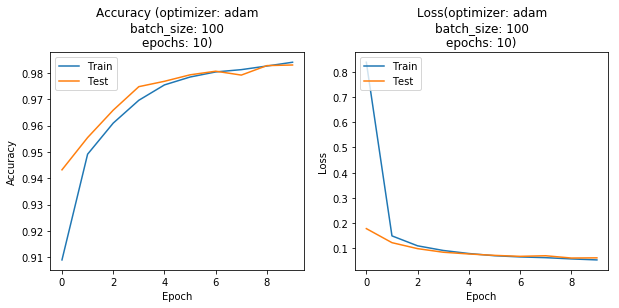

optimizer: adam
batch_size: 100
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd1eb8fe10>
test set

The test loss is [0.056194786477135494, 0.9856500172615051]

The accuracy of the model is 0.9254
hi <keras.callbacks.History object at 0x7fdd1eb8fe10>


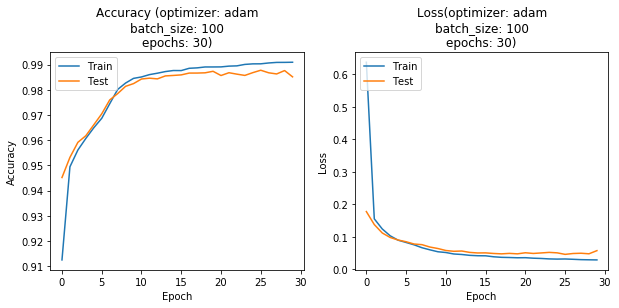

optimizer: adam
batch_size: 200
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd1e694d30>
test set

The test loss is [0.0585260358825326, 0.9841999864578247]

The accuracy of the model is 0.9189
hi <keras.callbacks.History object at 0x7fdd1e694d30>


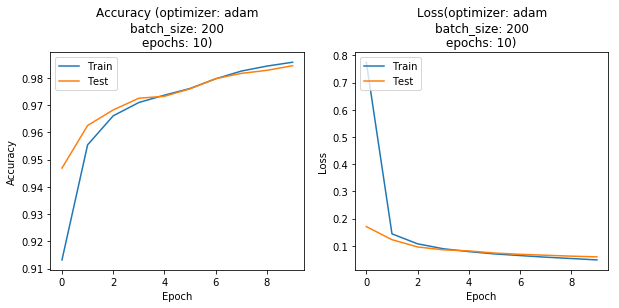

optimizer: adam
batch_size: 200
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd1e123048>
test set

The test loss is [0.044335936676943674, 0.9895599865913391]

The accuracy of the model is 0.9454
hi <keras.callbacks.History object at 0x7fdd1e123048>


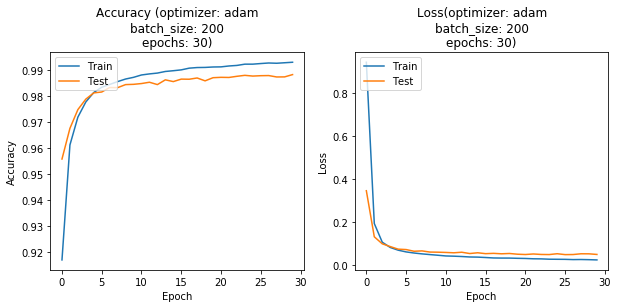

optimizer: adam
batch_size: 400
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd1dd00b00>
test set

The test loss is [0.06636443234980106, 0.9798099732398987]

The accuracy of the model is 0.8963
hi <keras.callbacks.History object at 0x7fdd1dd00b00>


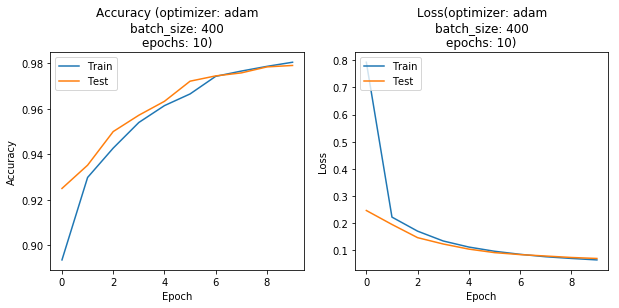

optimizer: adam
batch_size: 400
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd1e194080>
test set

The test loss is [0.05199705976992845, 0.9871199941635131]

The accuracy of the model is 0.9304
hi <keras.callbacks.History object at 0x7fdd1e194080>


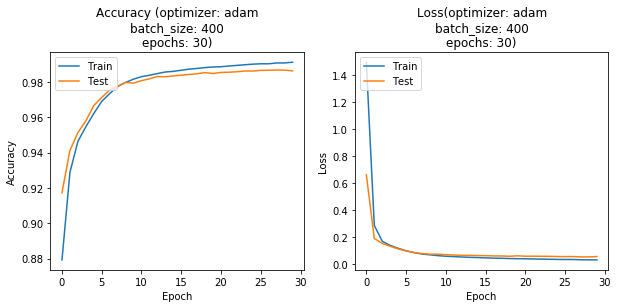

optimizer: sgd
batch_size: 100
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd203fa908>
test set

The test loss is [0.08290917729027569, 0.9744200092554093]

The accuracy of the model is 0.851
hi <keras.callbacks.History object at 0x7fdd203fa908>


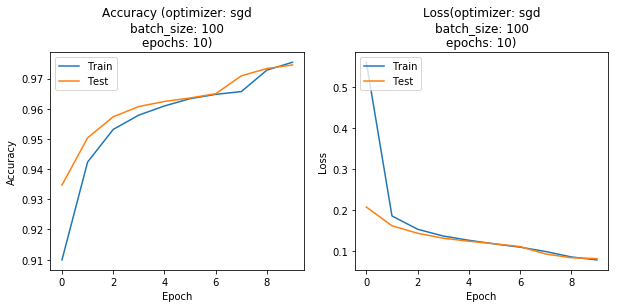

optimizer: sgd
batch_size: 100
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd21ce9c50>
test set

The test loss is [0.058814463461749254, 0.9821500205993652]

The accuracy of the model is 0.9025
hi <keras.callbacks.History object at 0x7fdd21ce9c50>


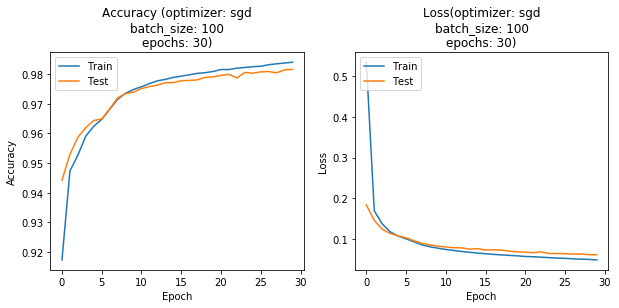

optimizer: sgd
batch_size: 200
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd217f3ba8>
test set

The test loss is [0.08524286348372698, 0.9787399756908417]

The accuracy of the model is 0.8794
hi <keras.callbacks.History object at 0x7fdd217f3ba8>


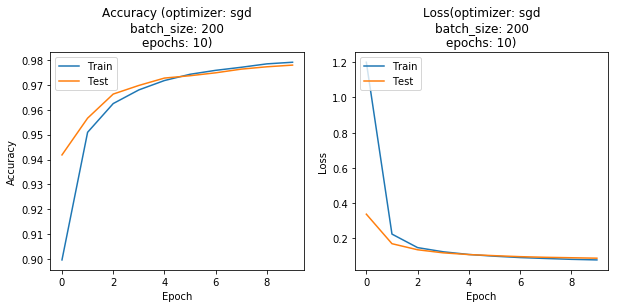

optimizer: sgd
batch_size: 200
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd1cf80f60>
test set

The test loss is [0.048397630923427644, 0.9847099792957306]

The accuracy of the model is 0.9201
hi <keras.callbacks.History object at 0x7fdd1cf80f60>


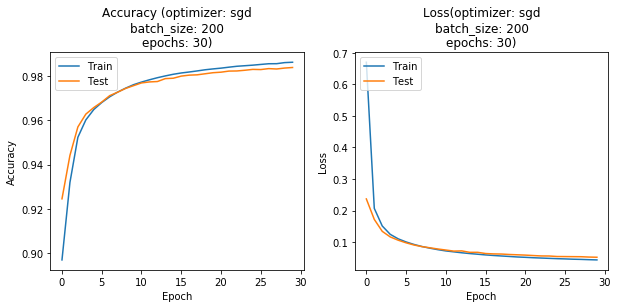

optimizer: sgd
batch_size: 400
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd1cd1f668>
test set

The test loss is [0.11483085066080094, 0.9666000390052796]

The accuracy of the model is 0.8344
hi <keras.callbacks.History object at 0x7fdd1cd1f668>


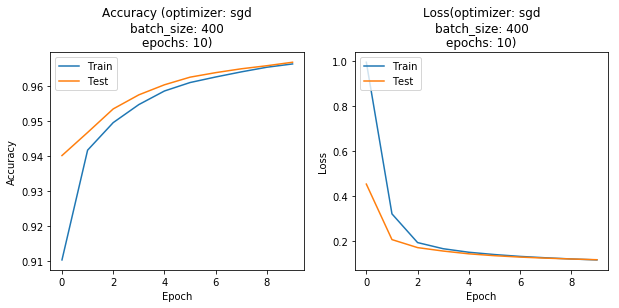

optimizer: sgd
batch_size: 400
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd1c7e3dd8>
test set

The test loss is [0.06356517627835273, 0.980579981803894]

The accuracy of the model is 0.8986
hi <keras.callbacks.History object at 0x7fdd1c7e3dd8>


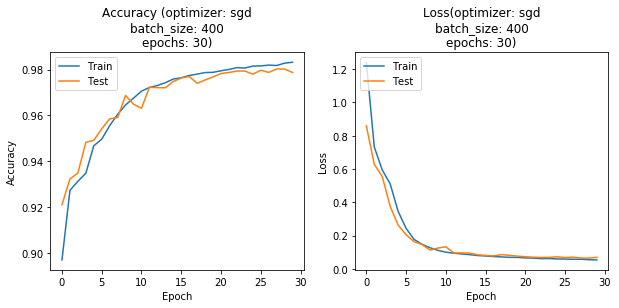

optimizer: rmsprop
batch_size: 100
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd21c6bbe0>
test set

The test loss is [0.056028571125352755, 0.9860000133514404]

The accuracy of the model is 0.922
hi <keras.callbacks.History object at 0x7fdd21c6bbe0>


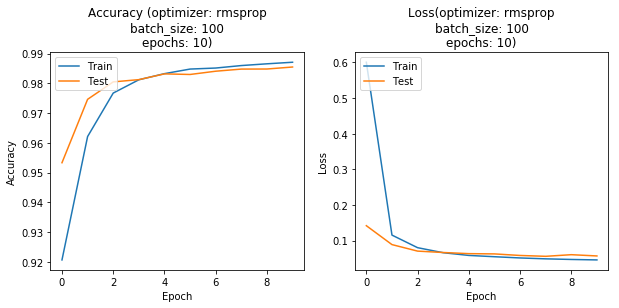

optimizer: rmsprop
batch_size: 100
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd1c020c18>
test set

The test loss is [0.05096726466319524, 0.9870000213384629]

The accuracy of the model is 0.9326
hi <keras.callbacks.History object at 0x7fdd1c020c18>


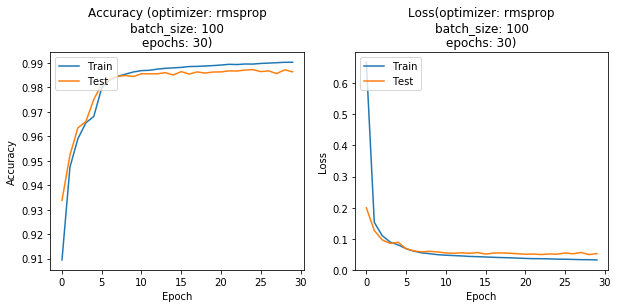

optimizer: rmsprop
batch_size: 200
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd1bba8fd0>
test set

The test loss is [0.054817516217008234, 0.9867299950122833]

The accuracy of the model is 0.9297
hi <keras.callbacks.History object at 0x7fdd1bba8fd0>


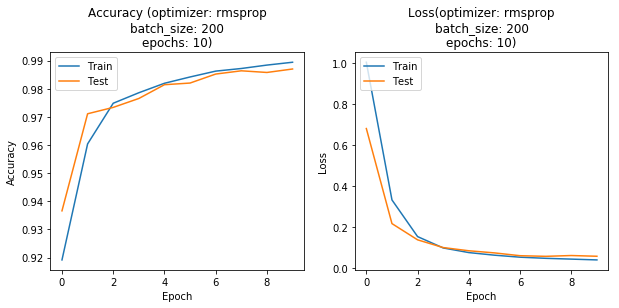

optimizer: rmsprop
batch_size: 200
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd1b78e7b8>
test set

The test loss is [0.04888275668257847, 0.9889999878406525]

The accuracy of the model is 0.9446
hi <keras.callbacks.History object at 0x7fdd1b78e7b8>


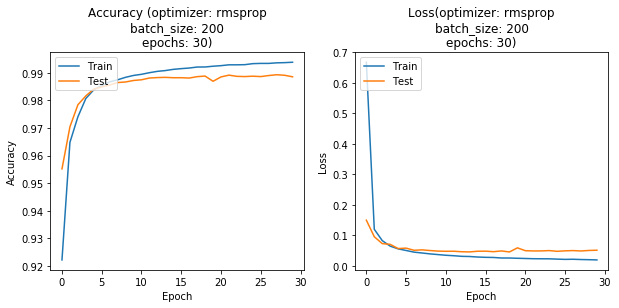

optimizer: rmsprop
batch_size: 400
epochs: 10
------------
hi <keras.callbacks.History object at 0x7fdd1c4b6dd8>
test set

The test loss is [0.06003158017992973, 0.9839599776268005]

The accuracy of the model is 0.9185
hi <keras.callbacks.History object at 0x7fdd1c4b6dd8>


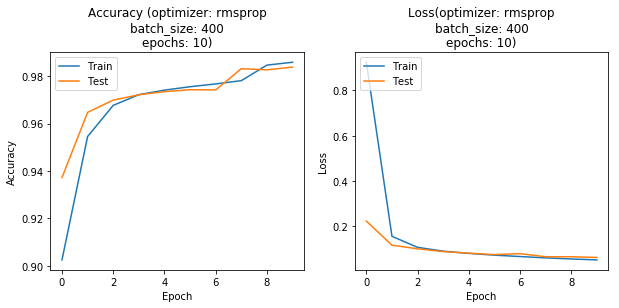

optimizer: rmsprop
batch_size: 400
epochs: 30
------------
hi <keras.callbacks.History object at 0x7fdd218701d0>
test set

The test loss is [0.047614919431507585, 0.9889399838447571]

The accuracy of the model is 0.9441
hi <keras.callbacks.History object at 0x7fdd218701d0>


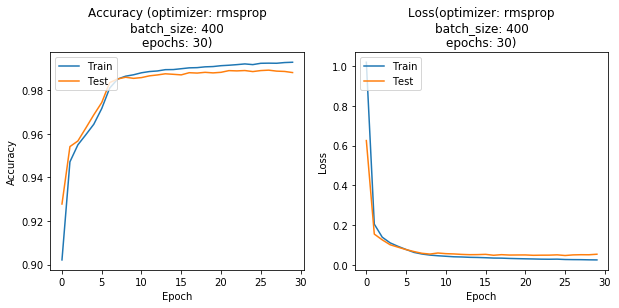

In [60]:
X_train, Y_train, X_test, Y_test = get_data()

for optimizer in ['adam', 'sgd', 'rmsprop']:
    for batch_size in [100, 200, 400]:
        for epochs in [10, 30]:
            print('==========')
            print('optimizer: {}\nbatch_size: {}\nepochs: {}'.format(optimizer, batch_size, epochs))
            print('------------')
            
            test = OptimizerTest(
                optimizer=optimizer,
                batch_size=batch_size,
                epochs=epochs
            )
            test.fit((X_train, Y_train))
            test.evaluate((X_test, Y_test))
            test.plot()
